In [139]:
import pandas as pd
import os

import matplotlib

pd.options.display.max_columns=10

pd.options.display.max_colwidth=800

In [140]:
DATASET_DIR = os.environ['DATASET_DIR']

In [141]:
!ls -al $DATASET_DIR/pubmed_data

total 21815700
drwxr-xr-x 3 vyasa vyasa           7 Oct  7 12:59 .
drwxr-xr-x 4 vyasa vyasa           9 Oct  1 12:15 ..
drwxr-xr-x 2 vyasa vyasa        1202 Sep 14 14:33 2019_merged_json_fixed
-rw-r--r-- 1 vyasa vyasa 22846312455 Sep 11 14:25 2019_merged_json_fixed.zip
-rw-r--r-- 1 vyasa vyasa    47646808 Oct  7 13:00 new_pattern_pred_label_pubmed_sample.tsv
-rw-r--r-- 1 vyasa vyasa    46324233 Oct  2 16:23 pubmed_file_bert_data_1_2.tsv
-rw-r--r-- 1 vyasa vyasa    47346687 Oct  2 16:23 pubmed_file_data_1_2.tsv


In [142]:
filepath = os.path.join(DATASET_DIR+'/pubmed_data/')
filepath

'/nfs/home/vyasa/projects/proj_os/data_os/bluebert_data/bert_data/ddi2013-type/pubmed_data/'

In [143]:
df = pd.read_csv(os.path.join(filepath+'new_pattern_pred_label_pubmed_sample.tsv'), encoding='utf=8', sep='\t')

In [144]:
# Data Checksum(df['drug_1_pos']>df['drug_2_pos'])

In [145]:
#choose only sequence length less than <= 510
drug_2_pos_len = df['drug_2_pos']+2

df_act = df[drug_2_pos_len<=510]

In [146]:
df_act[df_act['drug_2_pos']>=508].head(10)

,pmid,text_@DRUG$,token_length,drug_1,drug_1_pos,drug_2,drug_2_pos,predicted_label
588,15584,"Fluorine-19 nuclear magnetic resonance studies of effects of ligands on trifluoroacetonylated supernatant aspartate transaminase. The selective reaction of Cys-45 and -82, on the one hand, and Cys-390, on the other, with 3-bromo-1,1,1-trifluoropropanone allows for the probing of these regions of aspartate transaminase in the absence and in the presence of enzymatic ligands by 19F nuclear magnetic resonance (NMR). The 19F chemical shifts of the resonance lines differ for the three cysteines and so does their behavior with pH changes. The resonance signals with chemical shifts at 615 and 800 Hz upfield from trifluoroacetic acid correspond to modified cysteine-82 and -45 and have tentatively been assigned in this order. The 615-Hz resonance is affected by pH changes that fit best the infl...",538,alpha-ketoglutarate,372,succinate,508,DDI-false
2999,29607,"Factors affecting the activity of guanylate cyclase in lysates of human blood platelets. 1. Under optimal ionic conditions (4 mM-MnCl2) the specific activity of guanylate cyclase in fresh platelet lysates was about 10nmol of cyclic GMP formed/20 min per mg of protein at 30 degrees C. Activity was 15% of optimum with 10mM-MgCl2 and negligible with 4mM-CaCl2. Synergism between MnCl2 and MgCl2 or CaCl2 was observed when [MnCl2] less than or equal to [GPT]. 2. Lower than optimal specific activities were obtained in assays containing large volumes of platelet lysate, owing to the presence of inhibitory factors that could be removed by ultrafiltration. Adenine nucleotides accounted for less than 50% of the inhibitory activity. 3. Preincubation of lysate for 1 h at 30 degrees C increased the ...",621,indomethacin,385,Lubrol PX,508,DDI-false
6431,7669,"Catecholamine-induced changes in ion transport in short-circuited frog skin and the effect of beta-blockade. 1. A method for measuring bidirectional Cl fluxes has been used to estimate net Cl movements in short-circuited frog skin and to compare these with the short-circuit current (Isc) and Na fluxes. 2. In some experiments bidirectional fluxes of both Na and Cl were measured simultaneously. It was found that the algebraic sum of the net fluxes of these two ions did not differ significantly from the values of Isc, either in untreated or catecholamine-treated skins, except for the half-hour period immediately after catecholamine addition. 3. The net effluxes of Cl produced by noradrenaline (1-6 X 10(-5)M), isoprenaline (8 X 10(-7)M) and adrenaline (6 and 15 X 10(-6)M) were of similar m...",558,Na,366,oxprenolol,508,DDI-false
9015,5188,"The metabolic activation of the carcinogen 1'-hydroxysafrole in vivo and in vitro and the electrophilic reactivities of possible ultimate carcinogens. Administration of [2',3'-3H]-1'-hydroxysafrole to rats or mice resulted in the formation of hepatic DNA-, ribosomal RNA-, and protein-bound 3H derivatives. Alkaline digestion of the 3H-protein released 0.1 to 0.3% of the 3H as a derivative that was identified as 3'-methylmercaptoisosafrole by its cochromatography in five solvent systems with the synthetic compound. 1'-Hydroxysafrole was metabolized at a low rate by rat and mouse liver cytosols in a 3'-phosphoadenosine 5'-phosphosulfate-dependent reaction to a derivative (presumably the sulfuric acid ester) that was captured by its reaction with RNA. Likewise, 1'-hydroxysafrole was oxidiz...",542,1'-hydroxysafrole-2',240,"2',3'-dehydrosafrole",508,DDI-false
10144,4318,"An extracellular aminopeptidase from Clostridium histolyticum. An aminopeptidase was isolated from the culture filtrate of Clostridium histolyticum and purified to homogeneity. Absence of endopeptidase activity in the purified preparation was demonstrated. Gel filtration on a calibrated column indicates an apparent molecular weight of 340000 for the native enzyme. Gel electrophoresis of the denatured enzyme in the presence of dodecylsulfate in constant 

In [147]:
df_act['drug2_drug1_dis'] = df_act['drug_2_pos']-df_act['drug_1_pos']

/nfs/home/vyasa/software/pkg/blue_bert_py_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
df_act.shape

(28244, 9)

<AxesSubplot:>

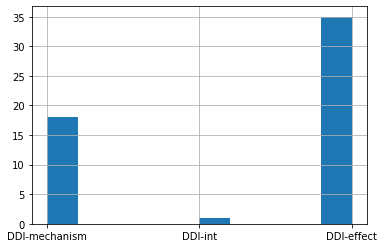

In [149]:
df_act[df_act['predicted_label']!='DDI-false']['predicted_label'].hist()

<AxesSubplot:>

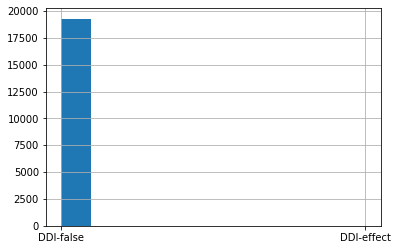

In [150]:
df_act[df_act['drug_2_pos']>=170]['predicted_label'].hist()

In [154]:
df_act[(df_act['drug_2_pos']>=170) & (df_act['predicted_label']!='DDI-false')]

,pmid,text_@DRUG$,token_length,drug_1,drug_1_pos,drug_2,drug_2_pos,predicted_label,drug2_drug1_dis
5329,1793,"The effect of dexamethasone on urinary acidification. Although it is well recognized that mineralocorticoids enhance renal acid excretion, the effect of glucocorticoids on renal acidification is unclear. Oral administration of @DRUG$ to six healthy volunteers for 1 week at a daily dose of 4.5 mg was associated with mild respiratory alkalosis and a small but statistically significant increase in baseline urine pH. However, neither the ability to lower urine pH nor to excrete titratable acid and ammonium after NH4Cl acid-loading was altered. Administration of a single intravenous dose of dexamethasone sodium phosphate (7.5 mg) was associated with a significant rise in urine pH and potassium excretion and decreased titratable acid, ammonium , and @DRUG$ excretion in the absence of changes...",198,dexamethasone,53,phosphorus,171,DDI-effect,118


In [138]:
df_act.loc[5329:5329, :]['text_@DRUG$']

5329    The effect of dexamethasone on urinary acidification. Although it is well recognized that mineralocorticoids enhance renal acid excretion, the effect of glucocorticoids on renal acidification is unclear. Oral administration of @DRUG$ to six healthy volunteers for 1 week at a daily dose of 4.5 mg was associated with mild respiratory alkalosis and a small but statistically significant increase in baseline urine pH. However, neither the ability to lower urine pH nor to excrete titratable acid and ammonium after NH4Cl acid-loading was altered. Administration of a single intravenous dose of dexamethasone sodium phosphate (7.5 mg) was associated with a significant rise in urine pH and potassium excretion and decreased titratable acid, ammonium , and @DRUG$ excretion in the absence of changes...
Name: text_@DRUG$, dtype: object

In [163]:
df_act_d1d2_prel = df_act[df_act['predicted_label']!='DDI-false'][['drug2_drug1_dis', 'predicted_label']]

<AxesSubplot:>

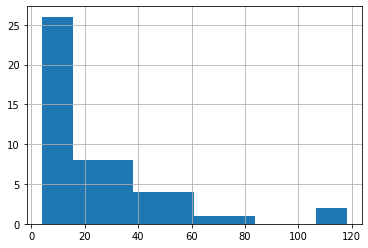

In [166]:
df_act_d1d2_prel['drug2_drug1_dis'].hist()

<AxesSubplot:>

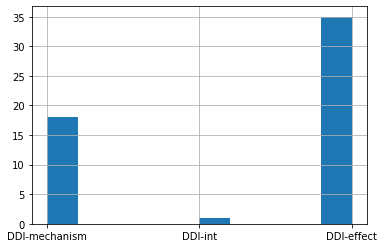

In [167]:
df_act_d1d2_prel['predicted_label'].hist()